<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET 5 - Parcours Data Analyst</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Librairies et fonctions</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Déclaration des fonctions</h3>
</div>

In [44]:
#######################################################################
# On écrit une fonction qui permettra de tester si une cle est fiable #
#######################################################################
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Importation et préparation des fichiers</h2>
</div>

In [45]:
# On importe le fichier ERP
df_erp = pd.read_excel('erp.xlsx')

# On observe
print(df_erp.shape)
print('')
df_erp.info()
df_erp.head()

(825, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [46]:
# On teste l'unicité de la clé primaire
testerCle(df_erp, ['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 5) (lignes, colonnes)


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Pour ce premier dataset, nous n'observons aucune difficulté.<br/>
Il n'y aucune ligne à null et la clé primaire est bien unique.

In [47]:
# On importe le fichier LIAISON
df_liaison = pd.read_excel('liaison.xlsx')

# On observe
print(df_liaison.shape)
print('')
df_liaison.info()
df_liaison.head()

(825, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [48]:
# On teste l'unicité de la clé primaire
testerCle(df_liaison, ['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 2) (lignes, colonnes)


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Pour ce second dataset, nous n'observons aucune difficulté.<br/>
Il n'y aucune ligne à null dans la colonne des product_id (qui est notre colonne de référence) et la clé primaire est bien unique.<br/>
<br/>
Il peut être intéressant de demander à l'étudiant qu'elle pourrait être une explication des valeurs nulles dans la colonne id_web.<br/>
Une explication parmi d'autres pourrait être que le produit correspondant à cette ligne n'est pas commercialisé sur le site internet (colonne onsale_web du dataframe df_erp).

In [49]:
# On importe le fichier WEB
df_web = pd.read_excel('web.xlsx')

# On observe
print(df_web.shape)
print('')
df_web.info()
df_web.head()

(1513, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object     

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
La colonne 'sku' correspond à la colonne 'id_web' du dataframe df_liaison.<br/>
Le nom est volontairement différent pour forcer l'étudiant à réfléchir sur le jeu de données.

In [50]:
# On teste l'unicité de la clé primaire
testerCle(df_web, 'sku')

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (1513, 28) (lignes, colonnes)


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Sur le troisième dataset, l'étudiant doit comprendre plus finement le jeu de données<br/>
La clé primaire n'est pas unique et cela peut s'expliquer par la présence de valeurs nulles.

In [51]:
# On observe les valeurs nulles détectées dans la colonnes sku
recherche_null = df_web[df_web['sku'].isnull()]

# On observe
print(recherche_null.shape)
print('')
recherche_null.info()
recherche_null.head()

(85, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
ATTENTION :<br/>
La tentation va être très forte pour l'étudiant de supprimer l'ensemble des lignes pour lesquelles le 'sku' est à NaN.<br/>
En effet, les lignes montrées dans le recherche_null.head() présentent des lignes totalement dénuées d'intérêt.<br/>
Cependant, on voit 2 lignes qui présentent des valeurs non-nulles dans l'affichage des informations.<br/>
L'étudiant doit prendre soin d'observer ces 2 lignes.

In [52]:
# On observe les lignes dont le post_name n'est pas nul
observation = recherche_null[recherche_null['post_name'].notnull()]

# On observe
print(observation.shape)
observation.head()

(2, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
ATTENTION :<br/>
Il est impératif que l'étudiant prenne soin de stocker ces 2 lignes qui correspondent à des véritables produits.<br/>
Idéalement, l'étudiant doit déclarer qu'il va investiguer auprès de collègues pour savoir si ces produits ont été décomissionnés ou s'il s'agit d'une erreur.<br/>
Dans ce dernier cas, il faudra corriger la source du problème.<br/>
<br/>
Après cela, nous pouvons supprimer les lignes NaN et retester l'unicité de la clé primaire.

In [53]:
df_web_without_null = df_web[df_web['sku'].notnull()]

# On observe
print(df_web_without_null.shape)
print('')
df_web_without_null.info()
df_web_without_null.head()

(1428, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object     

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [54]:
# On teste l'unicité de la clé primaire
testerCle(df_web_without_null, 'sku')

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (1428, 28) (lignes, colonnes)


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Malgré la suppression des NaN, l'unicité des la clé primaire n'est pas atteinte.<br/>
L'étudiant doit prendre le temps de comprendre le jeu de données.<br/>
On observe dans l'affichage des informations que certains comptages des valeurs non-nulles correspondent exactement à la moitié du nombre total de ligne.<br/>
L'étudiant doit trouver ce qui permet de discriminer ces 2 groupes.<br/>
Dans la colonne post_type, certaines lignes sont des "product" et d'autres des "attachment".<br/>
<br/>
Les "attachment" sont des liens vers les visuels d'illustration du produit et peuvent être supprimer sans crainte.

In [55]:
# On ne conserve que les "product"
df_product = df_web_without_null[df_web_without_null['post_type']=='product']

# On observe
print(df_product.shape)
df_product.head()

(714, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [56]:
# On teste l'unicité de la clé primaire
testerCle(df_product, 'sku')

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (714, 28) (lignes, colonnes)


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'unicité de la clé primaire est validée.<br/>
A ce stade, nous disposons de 3 dataframe préparés pour les jointures :<br/>
=> df_erp<br/>
=> df_liaison<br/>
=> df_product

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 3 - Jointures</h2>
</div>

In [57]:
# On va appliquer une jointure "outer" entre df_erp et df_liaison
df_erp_liaison = df_erp.merge(df_liaison, on='product_id', how='outer', indicator=True)

# On observe
print(df_erp_liaison.shape)
df_erp_liaison.head()

(825, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [58]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join = df_erp_liaison[df_erp_liaison['_merge']!='both']

# On observeP
print(df_test_join.shape)
df_test_join.head()

(0, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Pour cette première jointure tout c'est passé idéalement.<br/>
Chaque ligne à trouver une correspondance (une et une seule) dans la table de liaison.<br/>
<br/>
Nous pouvons continuer avec le df_product.

In [59]:
# On supprime la colonne '_merge'
df_erp_liaison = df_erp_liaison.drop(['_merge'], axis=1)

In [60]:
# On effectue une jointure "outer" entre df_erp_liaison et df_product
df_final = df_erp_liaison.merge(df_product, left_on='id_web', right_on='sku', how='outer', indicator=True)

# On observe
print(df_final.shape)
df_final.head()

(825, 35)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [61]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join = df_final[df_final['_merge']!='both']

# On observe
print(df_test_join.shape)
df_test_join.head()

(111, 35)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Pour cette seconde jointure, nous trouvons 111 lignes qui n'ont pas "matchées".<br/>
Il est important que l'étudiant vérifie et comprenne le résulat de ses jointures.<br/>
Regardons ce qui c'est passé de plus près`.

In [62]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join = df_final[df_final['_merge']=='left_only']

# On observeP
print(df_test_join.shape)
df_test_join.head()

(111, 35)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'intégralité des jointures non résolues sont de type 'left_only'<br/>
Cela signifie que des 'id_web' présents dans la table de liaison n'ont pas trouvé de correspondance dans les 'sku' du dataframe des produits.<br/>
Les premières lignes affichées montrent des NaN dans la colonne 'id_web'.<br/>
Nous allons vérifié si c'est la cas pour tout le dataframe.

In [63]:
# On observe les lignes dont l'id_web n'est pas nul
observation = df_test_join[df_test_join['id_web'].notnull()]

# On observe
print(observation.shape)
observation.head()

(20, 35)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Nous observons tout de même des lignes qui contenaient des id_web et qui n'ont pas trouvées de correspondance.<br/>
Pour la suite du projet, nous pouvons accepter de suprrimer les lignes qui n'ont pas jointées avec df_product.<br/>
Cependant, il est très important que l'étudiant exprime qu'il conviendra d'investiguer pour éventuellement trouver la source des ces manques.

In [64]:
# On ne conserve que les lignes qui ont trouvé une correspondance
df_final_ok = df_final[df_final['_merge']=='both']

# On supprime la colonne '_merge'
df_final_ok = df_final_ok.drop(['_merge'], axis=1)

# On observeP
print(df_final_ok.shape)
df_final_ok.head()

(714, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 4 - CA par produit et total</h2>
</div>

In [65]:
# On créé une colonne calculée
df_final_ok['CA_per_product'] = df_final_ok['price'] * df_final_ok['total_sales']

# On observe
colonnes = ['price', 'total_sales', 'CA_per_product'] 
observation = df_final_ok[colonnes]
print(observation.shape)
observation.head()

(714, 3)


,price,total_sales,CA_per_product
0,24.2,6.0,145.2
1,34.3,0.0,0.0
2,20.8,0.0,0.0
3,14.1,3.0,42.3
4,46.0,0.0,0.0


In [66]:
# On calcule la somme de la colonne CA_per_product
total = "{:,.2f}".format(df_final_ok['CA_per_product'].sum())

# On affiche le résultat
print(f"Le chiffre d'affaire total réalisé est de {total} euros.")

Le chiffre d'affaire total réalisé est de 70,568.60 euros.


<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Dans cette partie, il n'y a pas de difficulté particulière.<br/>
Le chiffre d'affaire à trouver est de 70568,60 euros.<br/>
On peut inviter l'étudiant à formater son résultat de manière "élégante" comme dans l'exemple ci-dessus.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 5 - Analyse univariée</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Méthode du z score (supérieur à 2 standard deviation)<br/>
<br/>
Z score = (Observation - Mean)/standard deviation</h3>
</div>

In [67]:
# On récupère la colonne price sous la forme d'une serie Pandas
price = df_final_ok['price']

# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(data):
    threshold=2
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# On observe
priceOutliers = detectOutlier(price)
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)

Nombre d'outliers détectés => 30
[100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - Méthode des interquartiles<br/>
<br/>
1,5 fois la distance interquartile avant le premier et après le troisième</h3>
</div>

In [68]:
# On ordonne la serie
price = sorted(price)

# On calcule l'interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))

# On calcule les valeurs limite
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print("Lower_bound => " + str(lower_bound))
print("Upper_bound => " + str(upper_bound))

# On cherche les outliers
result = df_final_ok[(df_final_ok['price'] > upper_bound) | (df_final_ok['price'] < lower_bound)]

# On observe
print("")
print("Nombre d'outliers détectés => " + str(len(result)))
result['price']

Q1 => 14.1
Q3 => 42.175000000000004
IQR => 28.075000000000003
Lower_bound => -28.012500000000003
Upper_bound => 84.28750000000001

Nombre d'outliers détectés => 32


154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Peut importe la méthode utilisée par l'étudiant.<br/>
Il est juste impératif qu'il fournisse une liste de ce qu'il identifie comme des outliers.<br/>
Il n'y a pas de "bonnes" réponses mais la méthode des interquartiles est communément reconnue comme la référence.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.3 - Méthode graphique avec un scatter plot</h3>
</div>

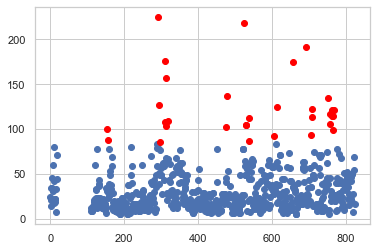

In [69]:
# On se créé 2 DataFrame pour séparé les couleurs
only_ok = df_final_ok[(df_final_ok['price'] < upper_bound) & (df_final_ok['price'] > lower_bound)]
only_outliers = df_final_ok[(df_final_ok['price'] > upper_bound) | (df_final_ok['price'] < lower_bound)]

# On plot
plt.scatter(only_ok['price'].index, only_ok['price'].values)
plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.4 - Méthode graphique avec boxplot (2 exemples)</h3>
</div>

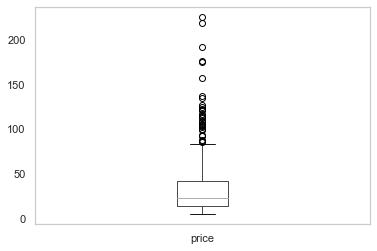

In [70]:
# On plot
df_final_ok.boxplot(column =['price'], grid = False) 

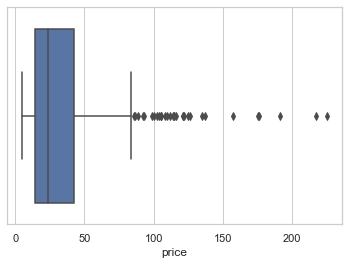

In [71]:
import seaborn as sns

# on plot
sns.set(style="whitegrid") 
sns.boxplot(x = 'price', data = df_final_ok) 

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
Une infinité de solutions existent.<br/>
Il ne faut pas hésiter à demander différentes approches à l'étudiant.<br/>
Cela lui permet de faire des recherches, manipuler et surtout comprendre...

<div style="color: RGB(255,114,0)">
<h3>Information Mentor bis</h3>
Il ne faut pas hésiter à interroger l'étudiant sur sa compréhension des outliers<br/>
Les outliers peuvent être des relevés de données défectueux (sensor, erreur humaine)<br/>
mais aussi des données "différentes".<br/>
Dans le cas exposé dans ce Notebook, il ne s'agit que de produits plus chers.<br/>
Cela peut donc être tout à fait normal et il ne faut en aucun cas supprimer ces outliers.